## Estandarizar el proceso de importacion de datos (al usar colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive/'My Drive'/Hs IrisNotebook

# Presentación del Dataset Iris

En el presente ejemplo comenzamos con un dataset **público** utilizado para la formación de **Machine Learning** denominado Iris dataset en base a las características del sépalo y pétalo de las flores.

In [1]:
#Comenzamos importando la librería seaborn para manipular los datos que extraigamos y convertirlos en gráficos para visualizarlos fácilmente
import pandas as pd
import seaborn as sns 

In [2]:
#Creamos la variable iris y le asignamos el dataset iris usando un método de sns (seaborn) denominado load_dataset que nos sirve para subir datos
#iris = sns.load_dataset('iris')
iris = pd.read_csv('iris.csv')
#Importar desde csv.. con pandas con el read_csv()

In [3]:
#Mostramos los primeros cinco (5) registros del dataset iris con la instrucción head. Este número se muestra por defecto
iris.head() 
#Usar el help y type y explicarlo....

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()
#float, object, integer, hay más...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Como resultado hemos obtenido 5 filas con las observaciones de las características de una flor.
    Hay una columna a la izquierda **en negrita** que hace referencia a la posición de cada fila que es el index. La primera fila ocupa el número **cero**
Hay una columna a la derecha denominada *species* que asigna el tipo de flor de cada observación. Esta columna es importante porque será la **variable objetivo** que vamos a predecir usando el método de **clustering** (aprendizaje *no supervisado*)

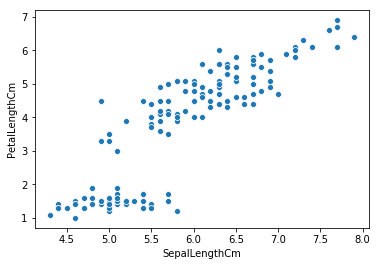

In [9]:
sns.scatterplot(x = 'SepalLengthCm', y='PetalLengthCm',data=iris)

C:\Users\pablo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


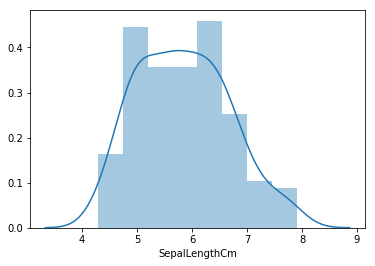

In [7]:
sns.distplot(iris['SepalLengthCm'])

C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


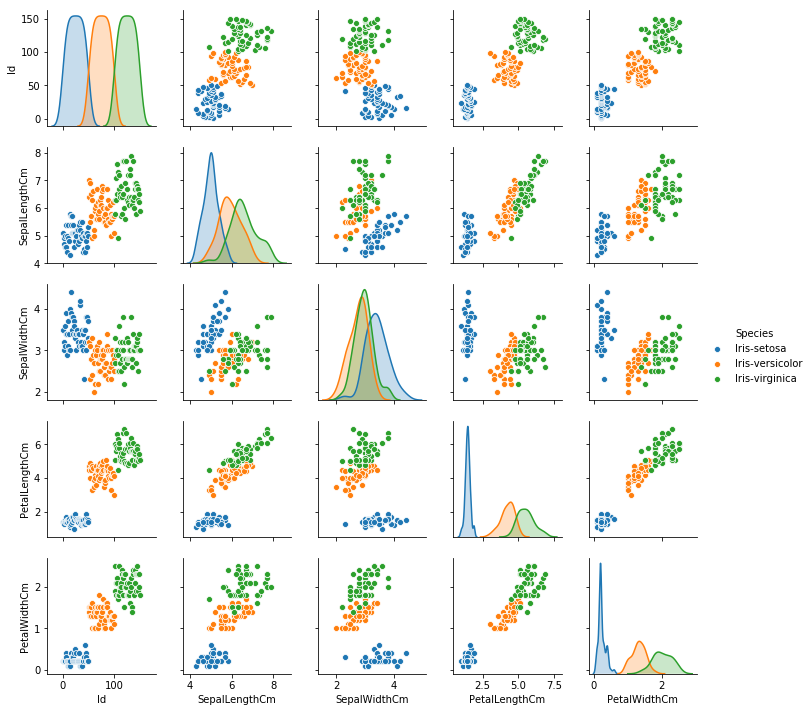

In [11]:
#Usando el método pairplot podemos graficar las cuatro variables del dataset iris cruzándolas entre ellas
#El parámetro hue le da nombre a la leyenda del gráfico y el size permite limitar el tamaño del gráfico (mientras más pequeño es más facil ver)
sns.pairplot(iris, hue = 'Species',size=2.0)

Las gráficas permiten identificar **relaciones directas** entre variables como por ejemplo las variables **petal_length y petal width** se pueden graficar siguiendo una regresión lineal.

# Tratamiento de la Data

Identificamos como **variable objetivo** (target) como 'species'. Las demás variables serán las **predictoras** (features) para el modelo. También podemos obtener estadísticos básicos de estas variables.

In [15]:
#Creamos una variable X_iris para guardar el resultado de eliminar la columna species del dataset iris
X_iris = iris.drop('Species', axis=1) 

#axis = 1 es para las columnas, axis = 0 es para las filas.

In [16]:
#Creamos una variable y_iris para guardar la columna species del dataset iris
y_iris = iris['Species']

In [17]:
#Para visualizar el tamaño del dataset utilizamos el método shape, como resultado obtenemos el números de filas y columnas (en este orden)
X_iris.shape

(150, 5)

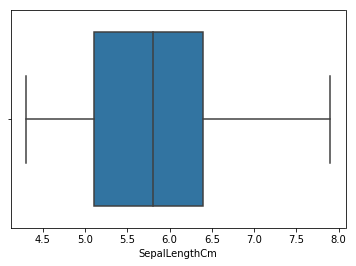

In [18]:
#Para visualizar la lista de estadísticos básicos utilizamos el método describe
sns.boxplot(x = 'SepalLengthCm', data=iris)

Estos descriptivos verifican que las cuatro variables almacenan **150 observaciones**, todas ellas con datos numéricos. Para este ejemplo no contamos con datos *categóricos* (no numéricos) y tampoco aparecen vacíos o errores. Sobre el tratamiento de este tipo de datos profundizaremos en las siguientes sesiones de clase

## Haremos PCA para poder ver que una clusterización te agrupa de manera intuitiva los targets.

Para aplicar el modelo de *clustering* vamos a realizar una **reducción de dimensionalidad** donde las variables predictoras se reducen a solo dos (2) PCA -que son las iniciales de *Principal Component Analysis*- de esta manera vamos a visualizar el dataset iris en función de solo dos *nuevas variables predictoras* denominadas PCA1 y PCA2

In [19]:
#Importamos la librería PCA
from sklearn.decomposition import PCA

#Creamos  una variable feature_pca para asignar PCA, definimos el valor de n_components para limitar a dos las variables finales
features_pca = PCA(n_components=2)

#Habría que saber cuáles son y qué hacen los parámetros dentro de las funciones.

In [20]:
#Adaptamos la variable creada feature_pca con la data guardada en X_iris
features_pca.fit(X_iris)

#Creamos una variable X_2D para guardar este último cambio
X_2D = features_pca.transform(X_iris)

In [21]:
print(X_2D)

[[ 7.45475269e+01  4.41425501e-01]
 [ 7.35491434e+01  3.09342060e-01]
 [ 7.25571205e+01  8.45275987e-02]
 [ 7.15517906e+01  1.60353347e-01]
 [ 7.05527631e+01  2.27636455e-01]
 [ 6.95354479e+01  6.82532551e-01]
 [ 6.85575899e+01 -2.06900363e-02]
 [ 6.75509913e+01  1.90728535e-01]
 [ 6.65616547e+01 -2.21321702e-01]
 [ 6.55544836e+01  3.65310173e-02]
 [ 6.45493236e+01  2.61818058e-01]
 [ 6.35536129e+01  1.12428635e-02]
 [ 6.25616417e+01 -2.15782028e-01]
 [ 6.15800901e+01 -7.50369097e-01]
 [ 6.05592753e+01  4.54831204e-02]
 [ 5.95491857e+01  2.51717420e-01]
 [ 5.85593354e+01 -9.42719598e-02]
 [ 5.75607105e+01 -2.22884291e-01]
 [ 5.65438233e+01  2.75209069e-01]
 [ 5.55600537e+01 -2.26573813e-01]
 [ 5.45496505e+01  2.36456946e-02]
 [ 5.35598142e+01 -2.78669404e-01]
 [ 5.25881927e+01 -1.03189848e+00]
 [ 5.15512172e+01 -1.61794017e-01]
 [ 5.05541515e+01 -2.71333356e-01]
 [ 4.95614527e+01 -4.53896023e-01]
 [ 4.85607484e+01 -4.44939327e-01]
 [ 4.75660251e+01 -5.26192293e-01]
 [ 4.65700805e+01 -6

Para visualizar el resultado de la reducción usamos el método **lmplot** del seaborn (sns). Previamente añadimos al dataset iris las dos dimensiones ya obtenidas: PCA 1 y PCA 2

In [22]:
#Añadimmos una columna denominada PCA1 al dataset iris usando la columna 0 de la variable X_2D, es decir la primera columna contando de izquierda a derecha
iris['PCA1'] = X_2D[:, 0]

#Añadimmos una columna denominada PCA2 al dataset iris usando la columna 1 de la variable X_2D, es decir la segunda columna contando de izquierda a derecha
iris['PCA2'] = X_2D[:, 1]

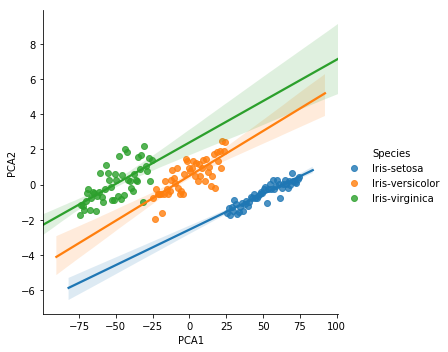

In [27]:
#Finalmente usamos el método lmplot para graficar ambas dimensiones, ahora nuestro dataset iris tiene dos nuevas columnas PCA1 y PCA2
sns.lmplot("PCA1", "PCA2", hue = 'Species', data=iris, fit_reg=True)

# Selección y preparación del modelo

Ahora vamos a seleccionar un **modelo de clustering o agrupamiento** denominado *Kmeans*. Este modelo lo vamos a adaptar con las nuevas dos dimensiones que obtuvimos a partir de X_iris (PCA1, PCA2). Ambas variables están guardadas en X_2D

In [29]:
#Importamos la librería KMeans
from sklearn.cluster import KMeans

#Creamos una variable kmeans para guardar el modelo Kmeans
#Definimos los parámetros n_clusters para limitar solo tres agrupamientos, también podemos definir el máximo de iteraciones con max_iter
kmeans = KMeans(n_clusters=3, max_iter=600)
#Habría que saber los parámetros, los por qués

In [30]:
#Perfilamos el modelo kmeans con los datos guardados en X_2D
kmeans = kmeans.fit(X_iris)

In [31]:
#Creamos una variable predicciones para obtener las predicciones usando el modelo kmeans a partir de los datos guardados en X_2D
predicciones = kmeans.predict(X_iris)

In [32]:
predicciones

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
iris['predicciones'] = predicciones
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predicciones',data = iris)

Finalmente procedemos a visualizar los cluster obtenidos usando una función denominada plot_kmeans. El desarrollo de esta función se encuentra en: https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f

In [28]:
#Importamos la librería pyplot para graficar
import matplotlib.pyplot as plt

In [29]:
#Importamos la librería cdist para definir la función XXXXXXXXXXXXXX
#Se importa la librería para medir las distancias dentro del espacio.
from scipy.spatial.distance import cdist

#Definimos una figura usando pyplot que será utilizado dentro de la función XXXXXXXXXXXXXXXX
#El siguiente script es para definir el tamaño del plot posterior.
plt.figure(figsize = (10,8))

#Definimos la función plot_kmeans
def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X) #.

    #Se tendría que explicar este código, por eso recomiendo hacer un plot más básico (buscar uno)
    ax = ax or plt.gca() #???????????
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2) 

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_ #Tiene el metodo cluster_centers_ para plotear alrededor de los centros
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)] #El radio para plotear el ciruclo
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

<Figure size 720x576 with 0 Axes>

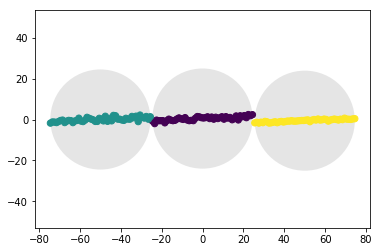

In [32]:
#Graficamos los cluster usando el modelo kmeans que hemos construido y los datos guardados en X_2D
plt.figure(figsize = (10,8))

plot_kmeans(kmeans, X_2D)

In [60]:
predicciones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])